### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [3]:
data = pd.read_csv('StudentsPerformance.csv')

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Dataframe shape

In [4]:
data.shape

(1000, 8)

### High level statistics about the data

In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Features Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking for Null values

In [7]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Exploratory Data Analysis

### Adding the new column

In [8]:
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score'])/3

In [9]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### Dropping the individual scores column

In [10]:
data.drop(['math score', 'reading score', 'writing score'], axis=1, inplace=True)

In [11]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


### students average

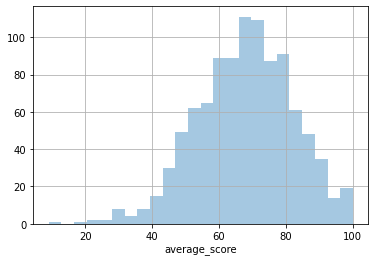

In [14]:
sns.distplot(data['average_score'], kde=False)
plt.grid()
plt.show()

####  `Observation: Most of students are getting average marks between 65 and 75.`

### Gender

In [17]:
pd.DataFrame(data['gender'].value_counts(normalize=True))

,gender
female,0.518
male,0.482


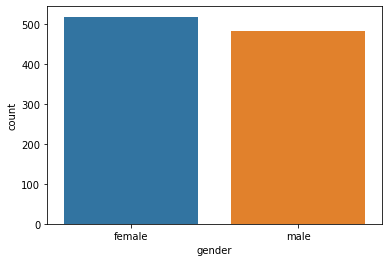

In [15]:
sns.countplot(data['gender'])
plt.show()

#### `observation: 52% of students are female and 48% are male`

### Race/Ethnicity

In [19]:
pd.DataFrame(data['race/ethnicity'].value_counts(normalize=True))

,race/ethnicity
group C,0.319
group D,0.262
group B,0.190
group E,0.140
group A,0.089


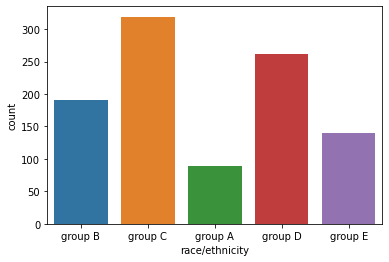

In [18]:
sns.countplot(data['race/ethnicity'])
plt.show()

#### `Observation: 32 % of the students are from group c and 9% of the students are from group a`

### Parental level of education

In [22]:
pd.DataFrame(data['parental level of education'].value_counts(normalize=True))

,parental level of education
some college,0.226
associate's degree,0.222
high school,0.196
some high school,0.179
bachelor's degree,0.118
master's degree,0.059


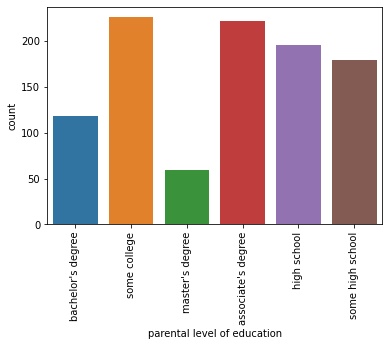

In [21]:
sns.countplot(data['parental level of education'])
plt.xticks(rotation=90)
plt.show()

#### `Observation: 23% of parents have attended some college and 6% of parents have masters degree`

### Lunch

In [24]:
pd.DataFrame(data['lunch'].value_counts(normalize=True))

,lunch
standard,0.645
free/reduced,0.355


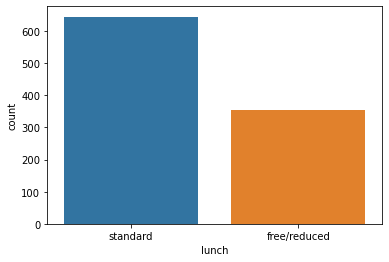

In [23]:
sns.countplot(data['lunch'])
plt.show()

#### `Observation: 65% of the students are having standard lunch`

### Test Preparation Course

In [26]:
pd.DataFrame(data['test preparation course'].value_counts(normalize=True))

,test preparation course
none,0.642
completed,0.358


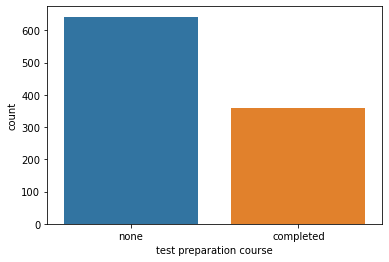

In [25]:
sns.countplot(data['test preparation course'])
plt.show()

#### `64% of the students have not enrolled for any test preparation course`

### How marks is varying with gender

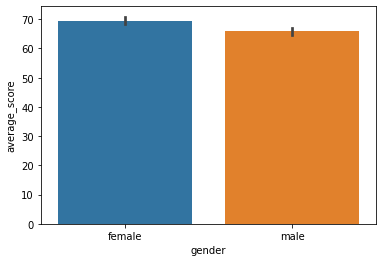

In [28]:
sns.barplot(data['gender'], data['average_score'])
plt.show()

#### `Observation: Average score of female is better than male`

### How average score is varying with race

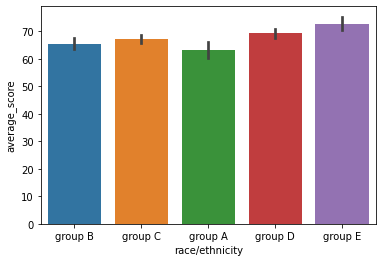

In [33]:
sns.barplot(x = 'race/ethnicity', y = 'average_score', data=data)
plt.show()

#### `Observation: Group E has the best average score`

### How parental level of education affects the average score

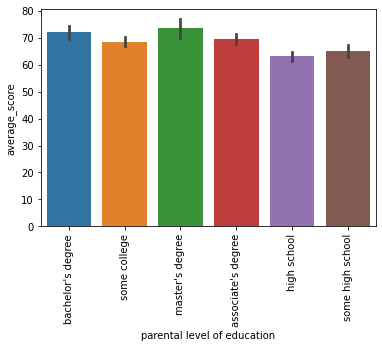

In [35]:
sns.barplot(data['parental level of education'], data['average_score'])
plt.xticks(rotation=90)
plt.show()

#### `Observation: students whose parents have master degree have better performance.`

### How lunch ia affecting the students performance

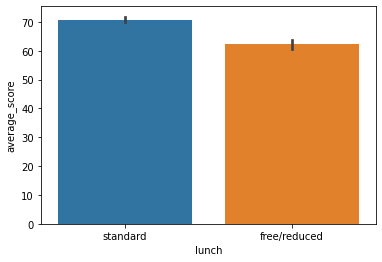

In [36]:
sns.barplot(data['lunch'], data['average_score'])
plt.show()

#### `Observation: Students who are having the standard lunch have better performance`

### How test preparation course affects the average score

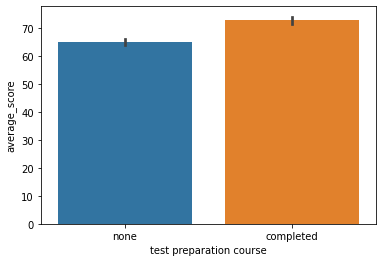

In [37]:
sns.barplot(data['test preparation course'], data['average_score'])
plt.show()

#### `Students who have completed test preparation course have the better performance`

In [62]:
from sklearn import preprocessing

encoder_gender = preprocessing.LabelEncoder()
gender_enc = encoder_gender.fit_transform(data['gender'])
gender_enc = gender_enc.reshape(-1,1)

In [63]:
encoder_race = preprocessing.LabelEncoder()
race_enc = encoder_race.fit_transform(data['race/ethnicity'])
race_enc = race_enc.reshape(-1,1)

In [91]:
encoder_edu = preprocessing.LabelEncoder()
edu_enc = encoder_edu.fit_transform(data['parental level of education'])
edu_enc = edu_enc.reshape(-1,1)

In [65]:
encoder_lunch = preprocessing.LabelEncoder()
lunch_enc = encoder_lunch.fit_transform(data['lunch'])
lunch_enc = lunch_enc.reshape(-1,1)

In [77]:
encoder_test = preprocessing.LabelEncoder()
test_enc = encoder_test.fit_transform(data['test preparation course'])
test_enc = test_enc.reshape(-1,1)

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

score_scaled = scaler.fit_transform(data.average_score.values.reshape(-1,1))
score_scaled.shape

(1000, 1)

In [92]:
encoded_data = np.concatenate((gender_enc, race_enc, edu_enc, lunch_enc, test_enc, score_scaled), axis=1)

In [82]:
encoded_data = pd.DataFrame(encoded_data)

encoded_data.head()

,0,1,2,3,4,5
0,0.0,1.0,1.0,1.0,1.0,0.343574
1,0.0,2.0,4.0,1.0,0.0,1.021927
2,0.0,1.0,3.0,1.0,1.0,1.747064
3,1.0,0.0,0.0,0.0,1.0,-1.293830
4,1.0,2.0,4.0,1.0,1.0,0.600881


In [83]:
data_corr = encoded_data.corr()

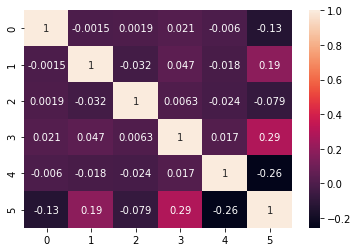

In [85]:
sns.heatmap(data_corr, annot=True)
plt.show()